In [1]:
# estensione del problema dinamico al caso Hopf bifurcation 
import numpy as np

data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")



#estrazione autovalori ed autovettori 
eigvals, eigvecs= np.linalg.eig(data)
data_norm = data/np.max(np.real(eigvals))

#calcolo della matrice laplaciana: ci conferisce la struttura matriciale avendo noramlizzato non abbiamo strenght
L= -np.diag(np.sum(data_norm, axis=1)) + data_norm  #controllare se la aggiunta è corretta per migliorare la visibilità
#print(L)

In [2]:
# costruzione della dinamica usando Hopf come modello
# si può considerare ancora una dinamica su modello x, y ( ma attenzione al significato che essi assumono ) 
# parte reale ed immaginaria ed similitudine con neuroni eccitatori/inibitori in W-C
def simulate_Hopf_dynamics(N, a, w):
    #qua simulo dinamica di Hopf con la presenza di un parametro a ( parametro di biforcazione ) 
    x = np.zeros((num_steps, N)) #costruisco le serie temporali, qua vogliamo da un lato il tempo dall'altro le regioni 
    y = np.zeros((num_steps, N))
    
    # partenza dal punto fisso 
    x[0, :] = np.random.rand(N) # random.rand mi pesca un numero casuale 
    y[0, :] = np.random.rand(N)

    # impongo che a ed w siano array ( idea è che passiamo a,w  come scalari e poi verranno convertiti con la stessa dimensione di x ed y) 
    a = np.full(N, a) if np.isscalar(a) else a
    w = np.full(N, w) if np.isscalar(w) else w
    
    for t in range(1, num_steps):
        # ad ogni passo abbiamo un rumore nella dinamica i due sono indipendenti  ( LI GENERIAMO QUA NON LI PASSO A PARAMETRI DELLA FUNZIONE !)
        x_noise = sigma * np.sqrt(dt) * np.random.randn(N)
        y_noise = sigma * np.sqrt(dt) * np.random.randn(N)
        # metodo di eulero per lo studio della derivazione 

        # attenzione qua che stiamo pescando un elemento associato ad indice dell'array questo vale sia per rumore che per i parametri (il codice interno mi converte poi a w come array)
        for i in range(N):
            # stiamo ricostruendo la struttura del sistema suddiviso in parte reale ed immaginaria !
            x[t, i] = x[t-1, i] + dt * ((a[i]-x[t-1,i]**2 - y[t-1,i]**2)*x[t-1,i] - w[i]*y[t-1,i])  + x_noise[i] # ancora siamo discreti 
            y[t, i] = y[t-1, i] + dt * ((a[i]-x[t-1,i]**2 - y[t-1,i]**2)*y[t-1,i] + w[i]*x[t-1,i]) + y_noise[i]
            # stiamo studiando parte reale ed immaginaria per Hopf 
    return x, y

200


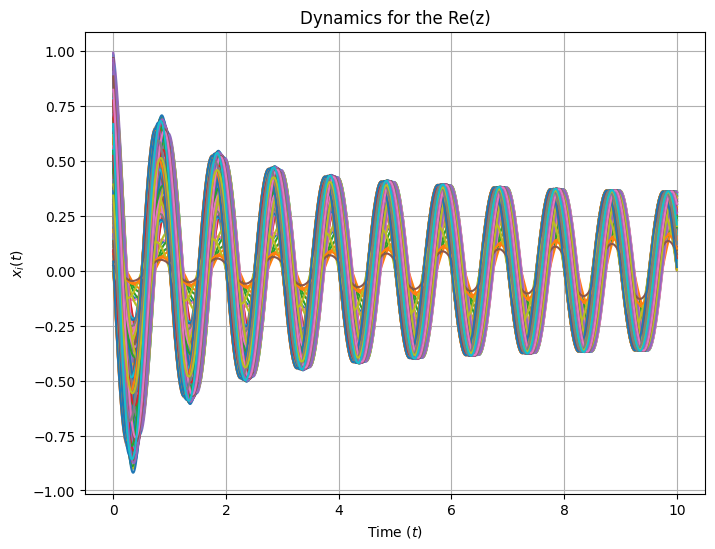

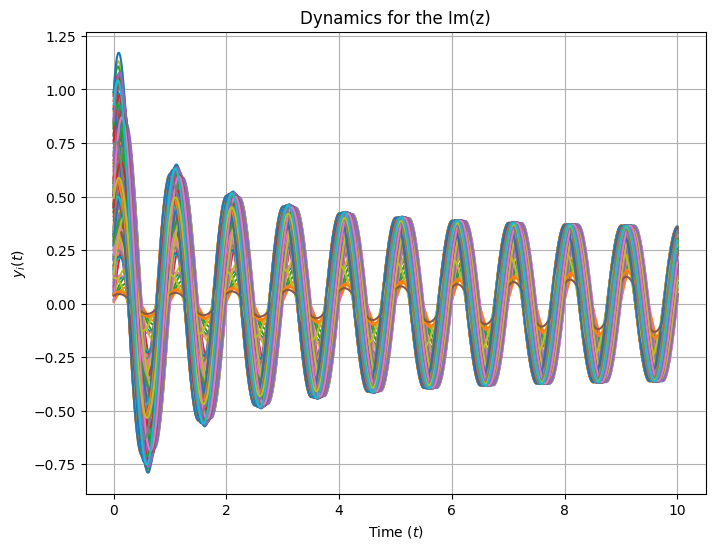

In [3]:
# simulazione della dinamica 
import matplotlib.pyplot as plt
# costruzione dei parametri 
N = L.shape[0] # prendo come indice la dimensione della matrice 
print(N)
#p = 0.2
a = 0.1              # parametro di biforcazione (fissato come positivo ) 
w = 2 * np.pi * 1.0  # frequenza naturale
sigma = 0.0001         # intensità del rumore
dt = 0.001
T = 10
num_steps = int(T / dt)
time = np.linspace(0, T, num_steps) # idea potrebbe essere quella di allungare i tempi di volo

x, y = simulate_Hopf_dynamics (N, a, w) # serve chiamare la funzione che svolge la simulazione della dinamica ( qua non abbiamo informazioni sulla dinamica di Hopf) 

plt.figure(figsize=(8, 8))
for i in range(N):
    plt.plot(time, x[:, i])
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$x_i(t)$")
plt.title("Dynamics for the Re(z)")
#plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
for i in range(N):
    plt.plot(time, y[:, i])
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$y_i(t)$")
plt.title("Dynamics for the Im(z)")
#plt.legend()
plt.grid()
plt.show()

# qua x, y assumono significati diversi cioè parte reale ed immaginaria di z ( stato del nodo )
# SELF-SUSTAINED OSCILLATIONS degli stati considerati !

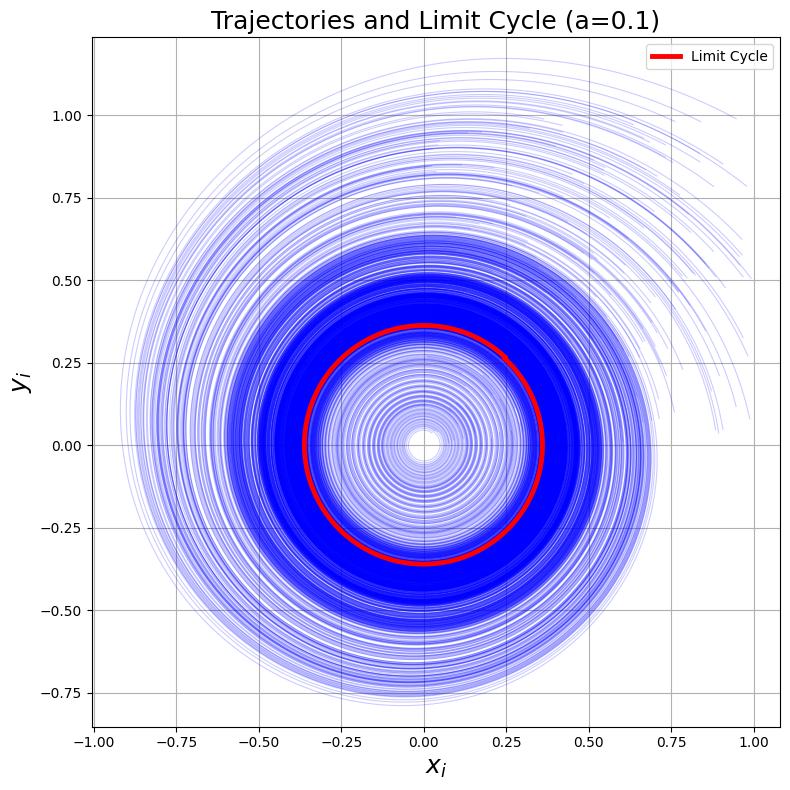

In [4]:
plt.figure(figsize=(8,8))
num_point=1000
for i in range(N):
    plt.plot(x[:, i], y[:, i], color='blue', alpha=0.2, linewidth=0.8)

# Ciclo limite finale
plt.plot(x[-num_point:, 0], y[-num_point:, 0],
         color='red', linewidth=3.5, label='Limit Cycle', zorder=3)

plt.xlabel('$x_i$', fontsize=18)
plt.ylabel('$y_i$', fontsize=18)
plt.title('Trajectories and Limit Cycle (a=0.1)', fontsize=18)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


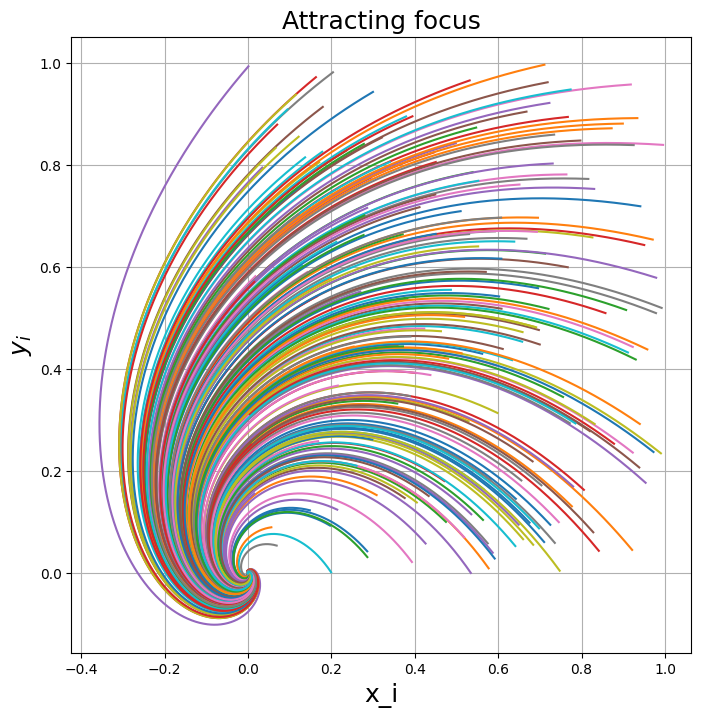

In [5]:

#richiamo la funzione per il calcolo della attività ( qua siamo in una configurazione SUPERCRITICA !)
x_negative, y_negative = simulate_Hopf_dynamics( N = N, a = -5, w = w ) # ricalcolo variando a ( a=0, parametro in cui si verifica transizione ) 

plt.figure(figsize=(8, 8)) 
for i in range(N):
    plt.plot(x_negative[:, i], y_negative[:, i])  
    
plt.xlabel(r"x_i", fontsize=18)
plt.ylabel(r"$y_i$", fontsize=18)
plt.title("Attracting focus", fontsize=18)
#plt.legend()
plt.grid(True)
plt.show()


# qua stiamo evidenziando punto di equilibrio stabile 


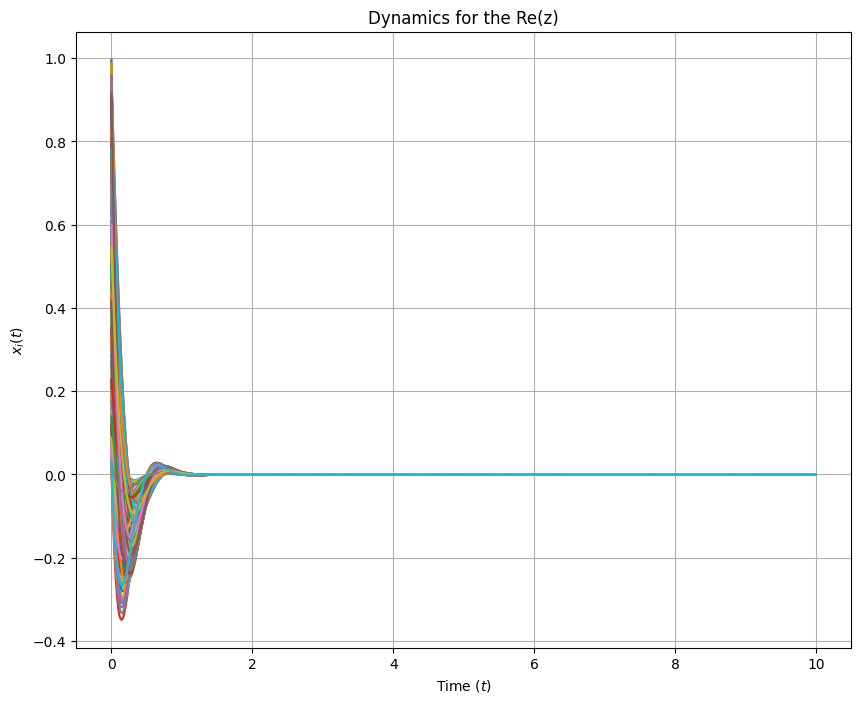

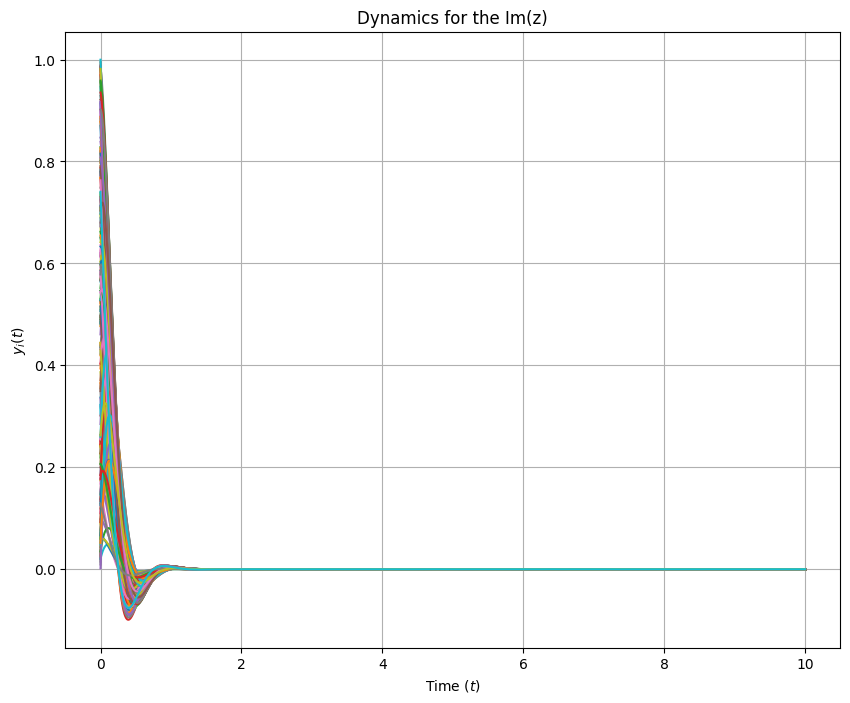

In [6]:
# simulazione per x, y nel caso di attracting focus 
a = -5 
x, y = simulate_Hopf_dynamics (N, a, w) # serve chiamare la funzione che svolge la simulazione della dinamica ( qua non abbiamo informazioni sulla dinamica di Hopf) 
# non è permesso mettere N=200 e poi il resto senza 

plt.figure(figsize=(10, 8))
for i in range(N):
    plt.plot(time, x[:, i])
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$x_i(t)$")
plt.title("Dynamics for the Re(z)")
#plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
for i in range(N):
    plt.plot(time, y[:, i])
plt.xlabel(r"Time ($t$)")
plt.ylabel(r"$y_i(t)$")
plt.title("Dynamics for the Im(z)")
#plt.legend()
plt.grid()
plt.show()


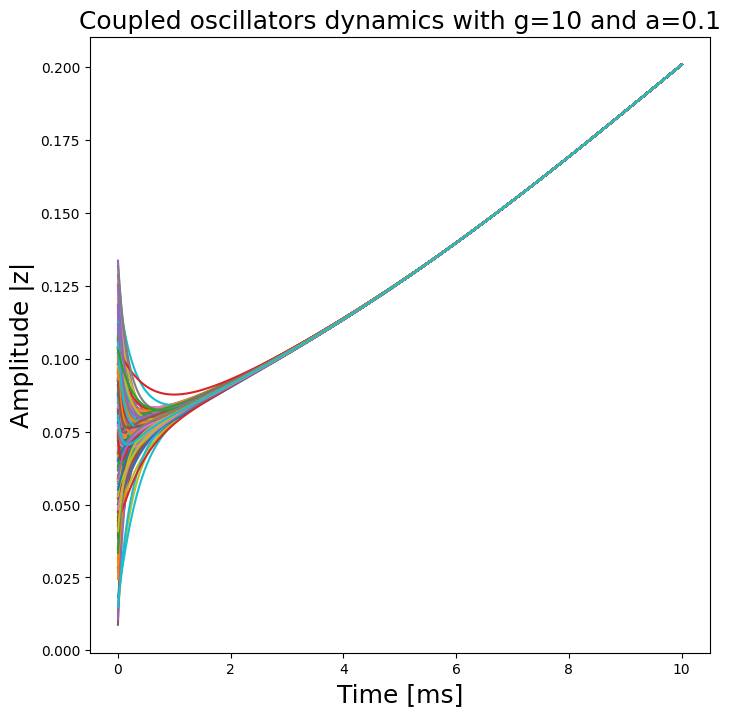

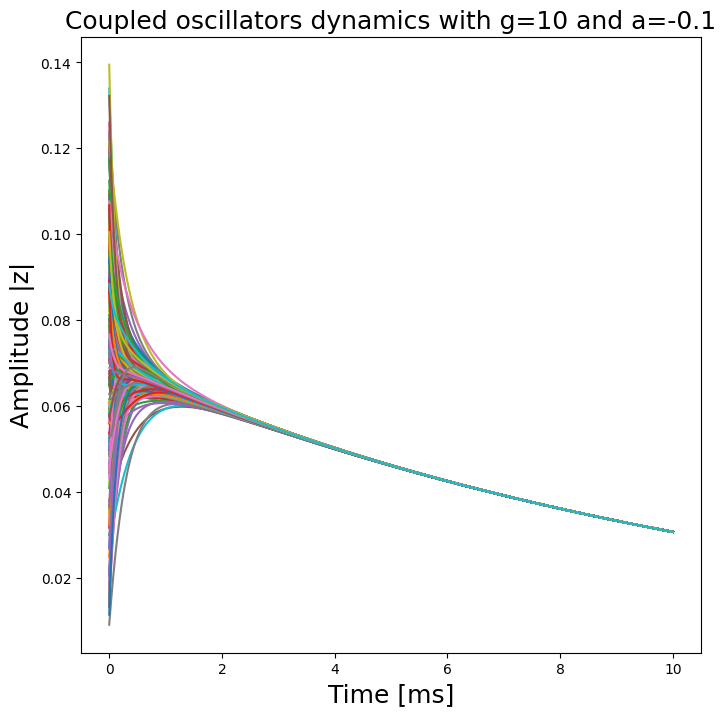

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# nel caso in questione cambiamo il parametro di a ma sempre negativo per meglio mostrare la simulazione, non vi è un cambio della dinamica 
def simulate_Hopf_dynamics_net(N, a, w, g, data, sigma, dt, T):
    num_steps = int(T / dt)
    time = np.linspace(0, T, num_steps)

    z = np.zeros((num_steps, N), dtype=complex)
    z[0, :] = 0.1 * (np.random.rand(N) + 1j * np.random.rand(N))

    for t in range(1, num_steps):
        noise = sigma * np.sqrt(dt) * (np.random.randn(N) + 1j * np.random.randn(N))
        coupling = g * (L @ z[t-1, :] - z[t-1, :] * np.sum(L, axis=1))
        dzdt = (a + 1j * w) * z[t-1, :] - np.abs(z[t-1, :])**2 * z[t-1, :] + coupling + noise #forma normale di una Hopf !
        z[t, :] = z[t-1, :] + dt * dzdt

    return z, time


# Parametri
N= L.shape[0] # attenzione è tupla (dobbiamo farci accesso in questo modo )
g = 10 #0.1 # ci gestisce il coupling ( come visto nella prima simulazione, simulazione Tesi 1) 
a = [0.1, -0.1] # parametro per la biforcazione, questo ci dice se abbiamo il raggiungimento di un punto fisso o meno 
w = 2 * np.pi * 1.0 #una sua modifica ci fa velocizzare i processi sul ciclo limite 
sigma = 0.0001
dt = 0.001
T = 10

z, time = simulate_Hopf_dynamics_net(N, a[0], w, g, L, sigma, dt, T) # qua sto verificando dinamica non lineare 
z_neg, time_neg = simulate_Hopf_dynamics_net(N, a[1], w, g, L, sigma, dt, T)

# Plot dinamica Hopf sul network
plt.figure(figsize=(8,8))
for i in range(N):
    plt.plot(time, np.abs(z[:, i]), label=f'osc_{i}')
#plt.axline( (0,np.sqrt(a[0])), slope=0, color='gray', linestyle='--' )
plt.xlabel('Time [ms]', fontsize=18)
plt.ylabel('Amplitude |z|', fontsize=18)
plt.title(f'Coupled oscillators dynamics with g={10} and a={0.1}', fontsize=18)
#plt.legend()
plt.show()

plt.figure(figsize=(8,8))
for i in range(N):
    plt.plot(time_neg, np.abs(z_neg[:, i]), label=f'osc_{i}')
#plt.axline( (0,0), slope=0, color='gray', linestyle='--' )
plt.xlabel('Time [ms]', fontsize=18)
plt.ylabel('Amplitude |z|', fontsize=18)
plt.title(f'Coupled oscillators dynamics with g={10} and a={-0.1}', fontsize=18)
#plt.legend()
plt.show()

# la tendenza è quella di andare verso 0 nel caso a<0 oppure np.sqrt(a) nell'altro caso (abbiamo dipendenza da quanto vicini siamo con a parametro di biforcazione )

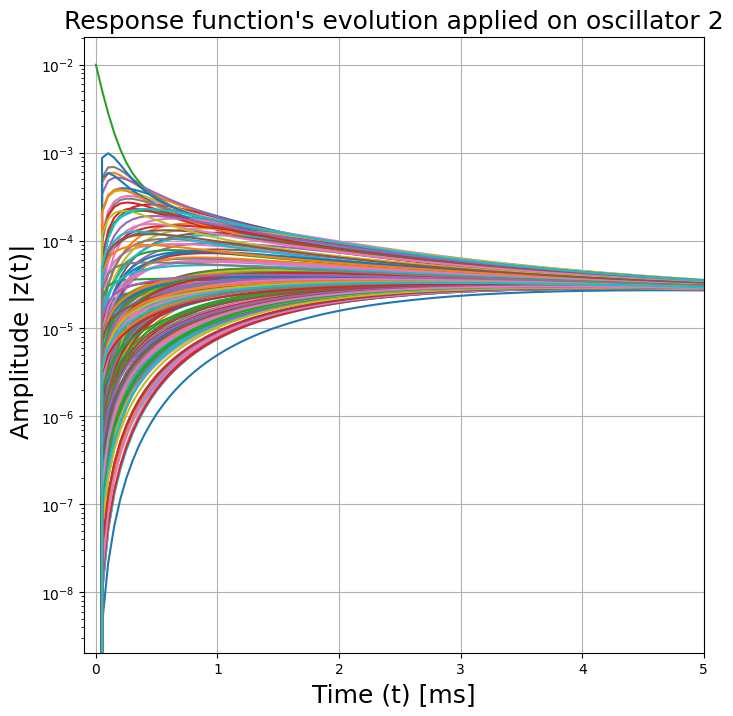

In [10]:
# valutiamo il comportamento della risposta nel momento in cui abbiamo applicato una perturbazione 
z0 = np.zeros(N, dtype=complex)
z0[2] = 0.01 #0.1 + 0j  # perturbazione iniziale su oscillatore 0 ( uso le stesse condizioni per il caso Wilson-Cowan ) siamo invarianti alla perturbazione nel caso lineare 
# prima differenza rispetto a quanto visto in altre casistiche 

response = analytic_response_functions @ z0  # shape (num_steps, N)

plt.figure(figsize=(8,8))
for i in range(N): 
    plt.plot(t1, np.abs(response[:, i]), label=f'osc_{i}')
plt.xlabel('Time (t) [ms]', fontsize=18)
plt.yscale("log")
plt.xlim(-0.1, 5)
plt.ylabel(' Amplitude |z(t)|', fontsize=18)
plt.title('Response function\'s evolution applied on oscillator 2', fontsize=18)
#plt.legend()
plt.grid(True)
plt.show()

# qua valutiamo la risposta di tutti i nodi alla perturbazione iniziale (QUA ABBIAMO RISPOSTA ANALITICA) 

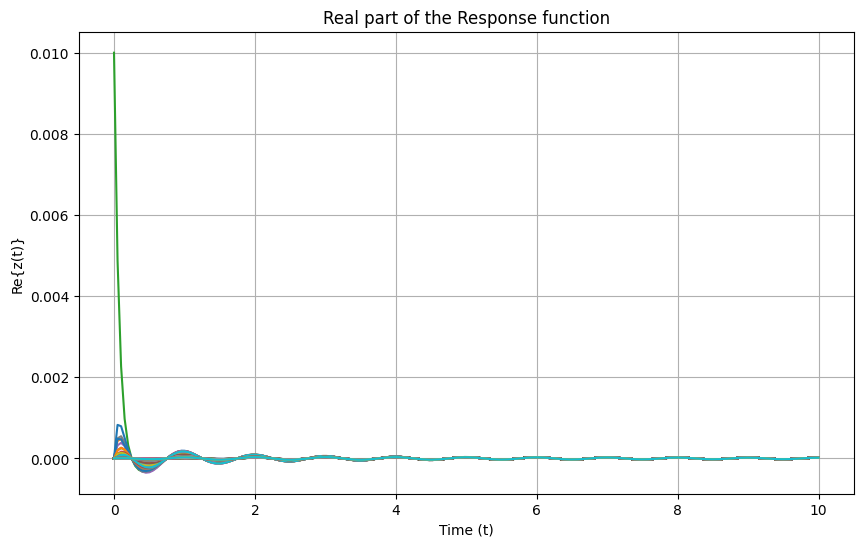

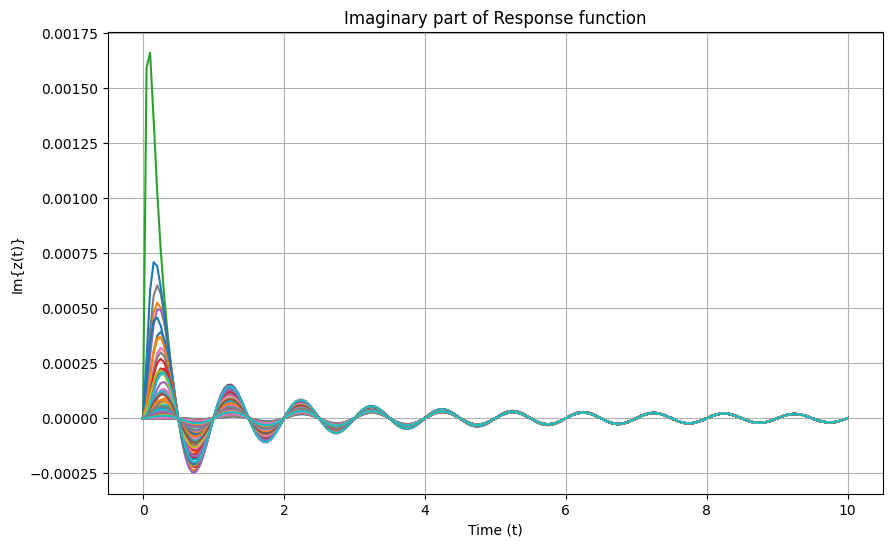

In [11]:
# Parte reale
plt.figure(figsize=(10,6))
for i in range(N):  # prime 9 componenti
    plt.plot(t1, response[:, i].real, label=f'osc_{i} (Re)')
plt.xlabel('Time (t)')
plt.ylabel('Re{z(t)}')
plt.title('Real part of the Response function')
#plt.ylim(0, 0.001)
plt.grid(True)
#plt.legend()
plt.show()

# Parte immaginaria
plt.figure(figsize=(10,6))
for i in range(N):
    plt.plot(t1, response[:, i].imag, label=f'osc_{i} (Im)')
plt.xlabel('Time (t)')
plt.ylabel('Im{z(t)}')
plt.title('Imaginary part of Response function')
plt.grid(True)
#plt.legend()
plt.show()


In [12]:
def simulate_perturbed_Hopf(N, a, w, g, index_perturb, epsilon, z0=None):
    z = np.zeros((num_steps, N), dtype=complex)

    if z0 is None:
        # stato iniziale tutto zero (rappresenta la nostra condizione iniziale per cui abbiamo equilibrio ) 
        z[0, :] = 0 + 0j
    else:
        z[0, :] = np.copy(z0)

    # applico la perturbazione solo al nodo specificato
    z[0, index_perturb] += epsilon

    for t in range(1, num_steps):
        noise = sigma * np.sqrt(dt) * (np.random.randn(N) + 1j * np.random.randn(N))
        coupling = g * (L @ z[t-1, :] - z[t-1, :] * np.sum(L, axis=1))
        dzdt = (a + 1j * w) * z[t-1, :] - np.abs(z[t-1, :])**2 * z[t-1, :] + coupling + noise
        z[t, :] = z[t-1, :] + dt * dzdt

    return z


C:\Users\fiasc\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\fiasc\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\fiasc\AppData\Local\Temp\ipykernel_3012\3631982864.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


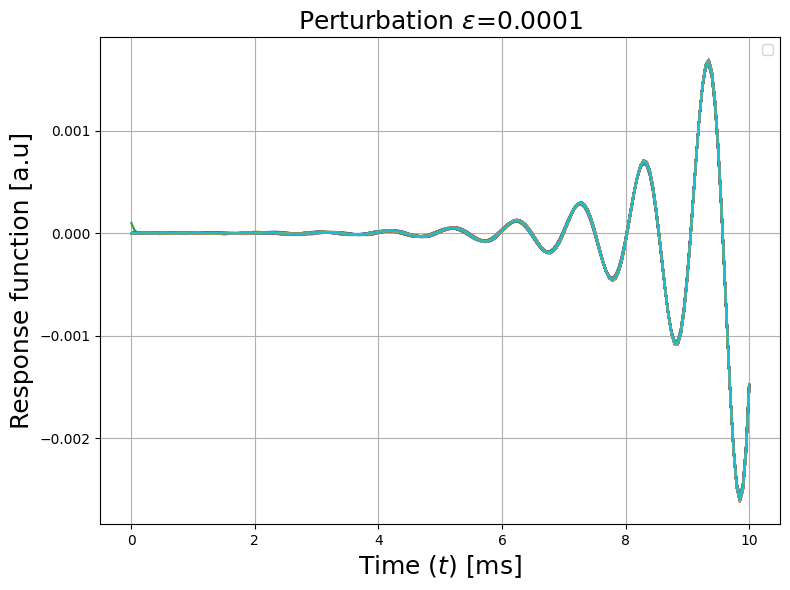

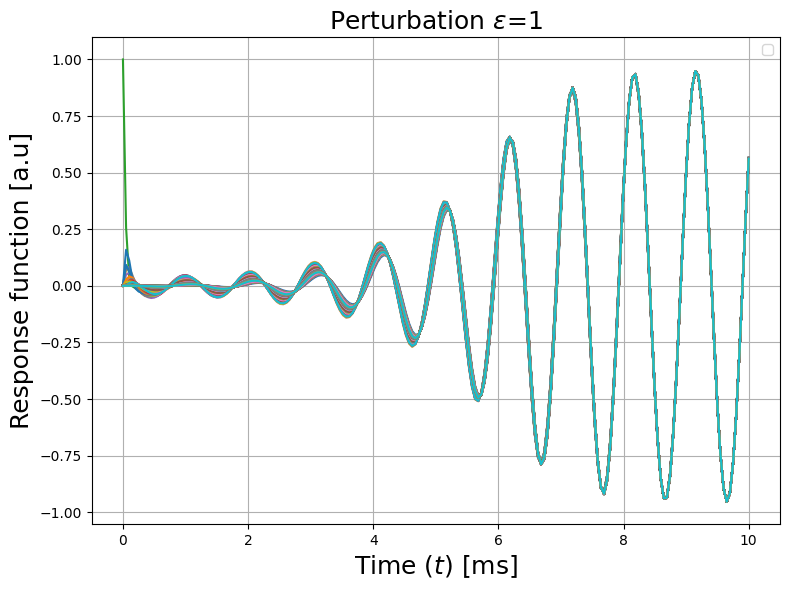

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri di test
N = L.shape[0]
index_perturb = 2
eps = [1e-4, 1]  # valori piccoli di epsilon
t_plot = t1
a = -0.1

for e in eps:
    # Risposta linearizzata
    z0_linear = np.zeros(N, dtype=complex)
    z0_linear[index_perturb] = e
    response_linear = analytic_response_functions @ z0_linear
    
    # Risposta non lineare
    response_nonlinear = simulate_perturbed_Hopf(N, a, w, g, index_perturb, e)
    
    # Plot per N oscillatori
    plt.figure(figsize=(8,6))
    for i in range(N):
        plt.plot(t_plot, response_nonlinear[:, i])
        #plt.plot(t_plot, response_linear[:, i], '--')
    
    plt.xlabel('Time $(t)$ [ms]', fontsize=18)
    plt.ylabel('Response function [a.u]', fontsize=18)
    plt.title(f'Perturbation $\epsilon$={e}', fontsize=18)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


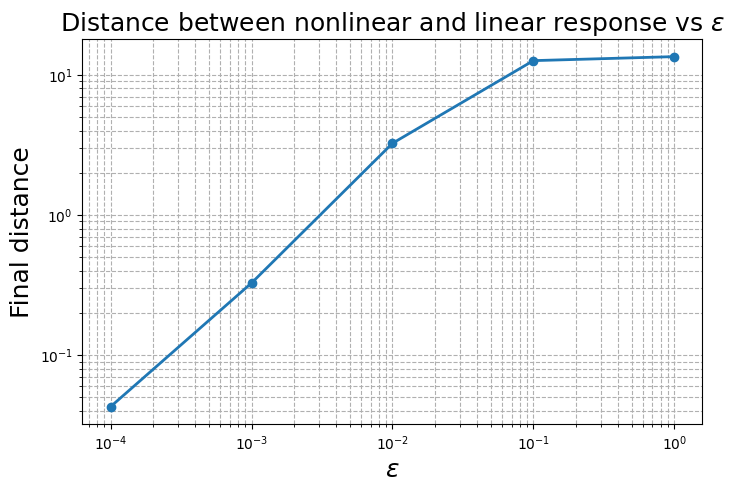

[0.04301381260351765, 0.32755894243140776, 3.24815268620071, 12.626022271078606, 13.486332701272831]


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri di test
N = L.shape[0]
index_perturb = 2
eps_list = [1e-4, 1e-3, 1e-2, 1e-1, 1]  # valori di epsilon
t_plot = t1
a = -0.1

# Lista per salvare la distanza finale per ogni epsilon
final_distances = []

for e in eps_list:
    # Risposta linearizzata
    z0_linear = np.zeros(N, dtype=complex)
    z0_linear[index_perturb] = e
    response_linear = analytic_response_functions @ z0_linear
    
    # Risposta non lineare
    response_nonlinear = simulate_perturbed_Hopf(N, a, w, g, index_perturb, e)
    
    # Calcolo della distanza (norma Euclidea) nel tempo
    distance = np.linalg.norm(response_nonlinear - response_linear, axis=1)
    
    final_distances.append(distance[-1])  # distanza all'ultimo step

# Plot epsilon vs distanza
plt.figure(figsize=(8,5))
plt.plot(eps_list, final_distances, 'o-', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\epsilon$', fontsize=18)
plt.ylabel('Final distance', fontsize=18)
plt.title('Distance between nonlinear and linear response vs $\epsilon$', fontsize=18 )
plt.grid(True, which='both', ls='--')
plt.show()

print(final_distances)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
N = L.shape[0]
index_perturb = 2
epsilons = [1e-4, 1e-3, 1e-2, 0.1, 1]  # valori di epsilon
t_plot = t1

# Liste per salvare le distanze
dist_L2 = []      # distanza assoluta
dist_L2_rel = []  # distanza relativa

for eps in epsilons:
    # --- Risposta linearizzata ---
    z0_linear = np.zeros(N, dtype=complex)
    z0_linear[index_perturb] = eps
    response_linear = analytic_response_functions @ z0_linear

    # --- Risposta non lineare ---
    response_nonlinear = simulate_perturbed_Hopf(N, a, w, g, index_perturb, eps)

    # --- Differenza ---
    diff = response_linear - response_nonlinear

    # --- Distanza L2 assoluta ---
    L2_abs = np.linalg.norm(diff)
    dist_L2.append(L2_abs)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.loglog(epsilons, dist_L2, 'o-', label='absolute value distance')
#plt.loglog(epsilons, dist_L2_rel, 's--', label='Distanza L2 relativa')
plt.xlabel('epsilon')
plt.ylabel('Distance')
#plt.yscale('log')
plt.title('Linear vs nonlinear behaviour varying the perturbation')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# valuto le distanze 
print ( f"Distanze : {dist_L2}")

In [ ]:
# dobbiamo runnare gli elementi che costruiscono la nostra struttura 

In [ ]:

import numpy as np

data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")
eigvals, eigvecs= np.linalg.eig(data)
data_norm = data/np.max(np.real(eigvals))


#calcolo della matrice laplaciana: ci conferisce la struttura matriciale avendo noramlizzato non abbiamo strenght
L= -np.diag(np.sum(data_norm, axis=1)) + data_norm  #controllare se la aggiunta è corretta per migliorare la visibilità
#print(L)

In [ ]:

def F(s):
    return 1/(1+np.exp(-s))

def simulate_dynamics_network_response(N, epsilon, index_perturbation):
    """
    Simulazione dinamica vettorizzata.
    """
    # Inizializzazione (punto fisso come stato iniziale)
    x = np.ones((num_steps, N)) * (1 - p)
    y = np.ones((num_steps, N)) * p

    # Perturbazione iniziale
    if 1 <= index_perturbation <= N:  # perturbazione su x
        x[0, index_perturbation-1] += epsilon
    elif 201 <= index_perturbation <= 400:  # perturbazione su y
        y[0, index_perturbation-N-1] += epsilon
    else:
        raise ValueError(f"Index {index_perturbation} out of range (1-{2*N})")

    # Evoluzione dinamica
    for t in range(1, num_steps):
        # input sinaptici vettorizzati
        s_x = -r * (y[t-1, :] - p) + L @ (x[t-1, :] - y[t-1, :])
        s_y =  r * (x[t-1, :] - (1 - p)) + L @ (x[t-1, :] - y[t-1, :])

        # attivazione nonlineare
        F_sx = 2 * (1 - p) * F(s_x)
        F_sy = 2 * p * F(s_y)

        # aggiornamento simultaneo di tutti i nodi
        x[t, :] = x[t-1, :] + dt * (F_sx - x[t-1, :])
        y[t, :] = y[t-1, :] + dt * (F_sy - y[t-1, :])

    return x, y

In [ ]:

from nilearn import datasets
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7) # qua importo la libreria ed il dataset di riferimento (suddivisione nelle n strutture)
labels = atlas.labels # dichiaro le etichette da cui estraggo infomrmazioni di appartenenza ! (questo è un array) 

#labels

# qua abbiamo costruito dizionario per la classificazione nodo network 
from collections import defaultdict

subnetworks = defaultdict(list)

for idx, label in enumerate(labels):
    label_str = str(label)  # questo perchè split non sopporta dati int o float (numeri) è un metodo che funziona su stringhe 
    parts = label_str.split('_')
    if len(parts) >= 3:
        subnet_name = parts[2]
    else:
        subnet_name = 'Unknown'
    subnetworks[subnet_name].append(idx)


In [ ]:
# modifica del parametro r (che influenza interazione locale della dinamica)
import numpy as np
import random
import matplotlib.pyplot as plt

# impostazioni modello Wilson–Cowan
r = 50
p = 0.2
dt = 0.001
T = 10
num_steps = int(T/dt)
time = np.arange(num_steps) * dt

# estrazione risposta (x/y) e riporto come scalare

def summarize_response(x, y, nodes, epsilon,
                       which='x',
                       baseline='fixed_point',
                       normalize_by_epsilon=True,
                       node_reduce='mean_abs',
                       time_reduce='max'):
    if len(nodes) == 0:
        return np.nan

    if which == 'x':
        Z = x[:, nodes] #qua è tempo per nodi 
        z_star = (1 - p) #il punto fisso riferito alla x
    else:
        Z = y[:, nodes]
        z_star = p

    if baseline == 'fixed_point':
        R = Z - z_star
    elif baseline == 'delta0':
        R = Z - Z[0:1, :]
    elif baseline == 'raw':
        R = Z.copy()
    else:
        raise ValueError("baseline non riconosciuta")

    if normalize_by_epsilon and epsilon != 0:
        R = R / epsilon

    if node_reduce == 'mean_abs':
        r_t = np.mean(np.abs(R), axis=1)
    elif node_reduce == 'mean':
        r_t = np.mean(R, axis=1) #abbiamo mediato fra i nodi rimane la struttura di una curva nel tempo
    else:
        raise ValueError("node_reduce deve essere 'mean' o 'mean_abs'")

    if time_reduce == 'mean':
        val = np.mean(r_t)
    elif time_reduce == 'max':
        val = np.max(r_t)
    else:
        raise ValueError("time_reduce deve essere 'mean' o 'max'")

    return val


# costruzione matrici di risposta 
def build_response_matrices(subnetworks, N, epsilon=0.01,
                            baseline='fixed_point',
                            normalize_by_epsilon=True,
                            node_reduce='mean_abs',
                            time_reduce='mean',
                            n_reps=3,
                            rng_seed=None):
    if rng_seed is not None:
        random.seed(rng_seed)
        np.random.seed(rng_seed)

    net_names = list(subnetworks.keys())
    nN = len(net_names)

    R_x = np.full((nN, nN), np.nan, dtype=float) #inizializzo la struttura delle matrici riferendomi ad eccitatori ed inibitori 
    R_y = np.full((nN, nN), np.nan, dtype=float)

    for i, src_net in enumerate(net_names):
        src_nodes = subnetworks[src_net]
        if len(src_nodes) == 0:
            continue

        agg_vals_x = {j: [] for j in range(nN)}
        agg_vals_y = {j: [] for j in range(nN)}

        for rep in range(n_reps):
            perturbed_node_0based = random.choice(src_nodes)

            x, y = simulate_dynamics_network_response(
                N=N,
                epsilon=epsilon,
                index_perturbation=perturbed_node_0based + 1
            )

            for j, obs_net in enumerate(net_names):
                obs_nodes = subnetworks[obs_net]
                if len(obs_nodes) == 0:
                    continue

                val_x = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='x',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )
                val_y = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='y',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )

                agg_vals_x[j].append(val_x)
                agg_vals_y[j].append(val_y)

        for j in range(nN):
            if len(agg_vals_x[j]) > 0:
                R_x[i, j] = np.nanmean(agg_vals_x[j])
            if len(agg_vals_y[j]) > 0:
                R_y[i, j] = np.nanmean(agg_vals_y[j])

    return net_names, R_x, R_y

# -----------------------------
#calcolo 
# -----------------------------
N = L.shape[0]
net_names = list(subnetworks.keys())

eps_values = [0.001, 0.01, 0.1, 1.0]
matrici = []

for eps in eps_values:
    _, R_x, R_y = build_response_matrices(
        subnetworks=subnetworks,
        N=N,
        epsilon=eps,
        baseline='fixed_point',
        normalize_by_epsilon=False,  # così vedi l'effetto dell'ampiezza
        node_reduce='mean_abs',
        time_reduce='max',
        n_reps=3,
        rng_seed=42
    )
    R_fin = np.sqrt(R_x**2 + R_y**2) #struttura della R [net_pert, n
    matrici.append(R_fin)
    
    # valutazione della compatibilità con lo 0 per ogni valore di epsilon 
    
    mean_map = np.nanmean(R_fin, axis=0)
    std_map = np.nanstd(R_fin, axis=0, ddof=1)
    compatible_1std = (mean_map - std_map <= 0) & (mean_map + std_map >= 0)
    print(f"standard_dev:{std_map}, mean_dev: {mean_map}, compatibility:{compatible_1std}") 
        



In [ ]:
vmin = min(np.min(m) for m in matrici)
vmax = max(np.max(m) for m in matrici)


In [ ]:
from matplotlib.colors import LogNorm

for eps, R_fin in zip(eps_values, matrici):
    plt.figure(figsize=(5, 4))
    plt.imshow(R_fin, cmap='cividis', norm=LogNorm(vmin=vmin, vmax=vmax))
    plt.title(f"ε = {eps}")
    plt.xticks(range(len(net_names)), net_names, rotation=45, ha='right')
    plt.yticks(range(len(net_names)), net_names)
    plt.colorbar(label='Response on networks')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X = []
labels_net = []
labels_eps = []

for eps, R_fin in zip(eps_values, matrici):
    for i, net in enumerate(net_names):
        X.append(R_fin[i, :])
        labels_net.append(net)
        labels_eps.append(eps)

X = np.array(X)

# Standardizzazione consigliata prima della PCA
scaler = StandardScaler()
X_z = scaler.fit_transform(X)

# PCA completa per ottenere explained variance per tutte le componenti
pca_full = PCA().fit(X_z)
evr = pca_full.explained_variance_ratio_  # array length = n_components ( controllare come ottiene ) 

# varianza spiegata da PC1 e PC2
pc1 = evr[0]
pc2 = evr[1] if evr.size > 1 else 0.0
cum12 = pc1 + pc2

print(f"PC1 explained variance: {pc1:.4f} ({pc1*100:.2f}%)")
print(f"PC2 explained variance: {pc2:.4f} ({pc2*100:.2f}%)")
print(f"PC1 + PC2 cumulative: {cum12:.4f} ({cum12*100:.2f}%)")

# Scree plot e cumulative explained variance plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(np.arange(1, len(evr)+1), evr*100, color='C0', edgecolor='k')
plt.xticks(np.arange(1, min(len(evr),20)+1))
plt.xlabel('Component')
plt.ylabel('Explained variance (%)')
plt.title('Scree plot (first components)')
plt.axvline(2.5, color='gray', linestyle='--', alpha=0.6)

plt.subplot(1,2,2)
plt.plot(np.cumsum(evr)*100, marker='o', color='C1')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Cumulative explained variance')
plt.axhline(cum12*100, color='red', linestyle='--', alpha=0.8)
plt.axvline(2, color='gray', linestyle='--', alpha=0.6)
plt.xlim(1, min(len(evr), 50))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# costruzione dataset come fatto in precedenza
X = []
labels_net = []
labels_eps = []

for eps, R_fin in zip(eps_values, matrici):
    for i, net in enumerate(net_names):
        X.append(R_fin[i, :])
        labels_net.append(net)
        labels_eps.append(eps)

X = np.array(X)

# standardizzazione
scaler = StandardScaler()
X_z = scaler.fit_transform(X)

# PCA con 3 componenti 
pca3 = PCA(n_components=3, random_state=42)
proj_all_3 = pca3.fit_transform(X_z)   # shape (n_samples, 3)

# varianza spiegata
evr = pca3.explained_variance_ratio_
print(f"PC1: {evr[0]:.4f} ({evr[0]*100:.2f}%)")
print(f"PC2: {evr[1]:.4f} ({evr[1]*100:.2f}%)")
print(f"PC3: {evr[2]:.4f} ({evr[2]*100:.2f}%)")
print(f"Cumulativa PC1+PC2+PC3: {(evr[0]+evr[1]+evr[2]):.4f} ({(evr[0]+evr[1]+evr[2])*100:.2f}%)")

# mappa unica per network
labels_net = [str(s).strip() for s in labels_net]
unique_nets = list(dict.fromkeys(net_names))  
net_to_idx = {net: i for i, net in enumerate(unique_nets)}

# palette e markers
markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']
colors = plt.cm.tab10(np.arange(len(unique_nets)) % 10)

# plotting 3D
for j, eps in enumerate(eps_values):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')

    # indici dei campioni per questo epsilon
    idx_eps = [i for i, e in enumerate(labels_eps) if e == eps]

    # disegna punti per network; etichetta solo la prima occorrenza per la legenda
    seen = set()
    for i in idx_eps:
        net = labels_net[i]
        net_idx = net_to_idx[net]
        m = markers[net_idx % len(markers)]
        c = colors[net_idx % len(colors)]
        lab = net if net not in seen else "_nolegend_"
        seen.add(net)
        ax.scatter(proj_all_3[i, 0], proj_all_3[i, 1], proj_all_3[i, 2],
                   marker=m, color=c, s=60, label=lab, edgecolors='k', linewidths=0.3)

    # legenda
    if j == 0:
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize=8, bbox_to_anchor=(1.15, 1))
    # per non mostrare mai la legenda commenta il blocco sopra e non passare label nelle scatter

    # estetica
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'3D PCA (PC1, PC2, PC3) – ε = {eps}')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    plt.tight_layout()
    plt.show()


In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#  markers per network
network_markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', '<', '>']
unique_nets_all = list(dict.fromkeys(labels_net))  # tutti i network nell'ordine d'origine
net_to_marker = {net: network_markers[i % len(network_markers)] for i, net in enumerate(unique_nets_all)}

k_fixed = 4
results_k4 = {}

for eps in eps_values:
    idx_eps = [i for i, e in enumerate(labels_eps) if e == eps]
    X_eps = proj_all_3[idx_eps, :]
    n = X_eps.shape[0]
    if n < 2 or k_fixed >= n:
        print(f"eps={eps}: skip (n={n}, k={k_fixed})")
        continue

    km = KMeans(n_clusters=k_fixed, random_state=42, n_init=10)
    labels_local = km.fit_predict(X_eps)
    centroids = km.cluster_centers_

    
    results_k4[eps] = {
        'k': k_fixed,
        'labels_local': labels_local,
        'indices': idx_eps,
        'centroids': centroids
    }

    # Preparazione plotting
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    unique_clusters = np.unique(labels_local)
    cmap = plt.cm.get_cmap('tab10', max(3, len(unique_clusters)))

    
    for cl in unique_clusters:
        color = cmap(int(np.where(unique_clusters == cl)[0]))
        
        sel_cluster_local = np.where(labels_local == cl)[0]
        
        for net in unique_nets_all:
            
            sel_local_net = [
                i_local for i_local in sel_cluster_local
                if labels_net[idx_eps[i_local]] == net
            ]
            if len(sel_local_net) == 0:
                continue
            sel_local_net = np.array(sel_local_net)
            ax.scatter(
                X_eps[sel_local_net, 0], X_eps[sel_local_net, 1], X_eps[sel_local_net, 2],
                s=60,
                c=[color],
                marker=net_to_marker[net],
                edgecolors='none',
                linewidths=0,
                alpha=1.0,
                antialiased=False,
                depthshade=False
            )

    # Legenda
    cluster_handles = []
    cluster_labels = []
    for cl in unique_clusters:
        color = cmap(int(np.where(unique_clusters == cl)[0]))
        cluster_handles.append(Patch(facecolor=color, edgecolor='k'))
        cluster_labels.append(f'cluster {cl}')
   
    network_handles = []
    network_labels = []
    for net in unique_nets_all:
        network_handles.append(Line2D([0], [0], marker=net_to_marker[net], color='w',
                                      markerfacecolor='gray', markeredgecolor='k', markersize=8))
        network_labels.append(net)
    leg1 = ax.legend(cluster_handles, cluster_labels, title='Clusters (color)', loc='upper right',
                     bbox_to_anchor=(1.35, 1), fontsize=8)
    ax.add_artist(leg1)
    leg2 = ax.legend(network_handles, network_labels, title='Networks (marker)', loc='upper right',
                     bbox_to_anchor=(1.35, 0.35), fontsize=8)

    ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
    ax.set_title(f'KMeans k={k_fixed}  eps={eps}')
    ax.xaxis.pane.fill = False; ax.yaxis.pane.fill = False; ax.zaxis.pane.fill = False
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

X = []
labels_net = []
labels_eps = []

for eps, R_fin in zip(eps_values, matrici):
    for i, net in enumerate(net_names):
        X.append(R_fin[i, :])
        labels_net.append(net)
        labels_eps.append(eps)

X = np.array(X)

#  PCA 
pca = PCA(n_components=2)
proj_all = pca.fit_transform(X)

# Calcolo spostamenti
df_proj = pd.DataFrame({
    "net": labels_net,
    "eps": labels_eps,
    "PC1": proj_all[:, 0],
    "PC2": proj_all[:, 1]
})

# Ordina per epsilon
df_proj.sort_values(by=["net", "eps"], inplace=True)

# Calcola distanza tra punti consecutivi per ogni network
df_proj["shift"] = df_proj.groupby("net")[["PC1", "PC2"]].diff().pow(2).sum(axis=1).pow(0.5)


summary = df_proj.groupby("net")["shift"].agg(["sum", "mean"]).reset_index()
summary.rename(columns={"sum": "spostamento_totale", "mean": "spostamento_medio"}, inplace=True)

print(summary)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Marker e colori per i network
markers = ['o', 's', '^', 'D', 'v', 'P', '*']
colors = plt.cm.tab10(np.arange(len(net_names)))

# PCA unica su tutti i dati per avere assi fissi
X = []
labels_net = []
labels_eps = []

for eps, R_fin in zip(eps_values, matrici):
    for i, net in enumerate(net_names):
        X.append(R_fin[i, :])
        labels_net.append(net)
        labels_eps.append(eps)

X = np.array(X)
pca = PCA(n_components=2)
proj_all = pca.fit_transform(X)

# Ciclo su ogni epsilon
for eps in eps_values:
    idx_eps = [i for i, e in enumerate(labels_eps) if e == eps]
    proj_eps = proj_all[idx_eps]
    nets_eps = [labels_net[i] for i in idx_eps]

    # Clustering K-means solo su questi punti
    n_clusters = 3
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(proj_eps)

    plt.figure(figsize=(6, 5))
    used_labels = set()  # per evitare duplicati in legenda
    for i, (x, y, net, cl) in enumerate(zip(proj_eps[:, 0], proj_eps[:, 1], nets_eps, cluster_labels)):
        label = net if net not in used_labels else None
        plt.scatter(x, y,
                    c=f"C{cl}",
                    marker=markers[i % len(markers)],
                    s=120,
                    edgecolor='k',
                    label=label)
        used_labels.add(net)

    plt.title(f"Clustering K-means – ε = {eps}")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.legend(title="Networks", loc='best', fontsize=8)
    plt.tight_layout()
    plt.show()


# al variare della perturbazione vediamo come rimangono stabili le risposte dei network come quantificato in precedenza la distanza non è elevata
#in questo modo possiamo ricostruire una struttura funzionale basata sulla risposta usando clustering come procedura 


In [ ]:
# modifica del parametro r (che influenza interazione locale della dinamica)
import numpy as np
import random
import matplotlib.pyplot as plt

# impostazioni modello Wilson–Cowan
#r = 50
p = 0.2
dt = 0.001
T = 10
num_steps = int(T/dt)
time = np.arange(num_steps) * dt

# -------------------------------
# estrazione risposta (x/y) e riporto come scalare
# -------------------------------
def summarize_response(x, y, nodes, epsilon,
                       which='x',
                       baseline='fixed_point',
                       normalize_by_epsilon=True,
                       node_reduce='mean_abs',
                       time_reduce='max'):
    if len(nodes) == 0:
        return np.nan

    if which == 'x':
        Z = x[:, nodes]
        z_star = (1 - p)
    else:
        Z = y[:, nodes]
        z_star = p

    if baseline == 'fixed_point':
        R = Z - z_star
    elif baseline == 'delta0':
        R = Z - Z[0:1, :]
    elif baseline == 'raw':
        R = Z.copy()
    else:
        raise ValueError("baseline non riconosciuta")

    if normalize_by_epsilon and epsilon != 0:
        R = R / epsilon

    if node_reduce == 'mean_abs':
        r_t = np.mean(np.abs(R), axis=1)
    elif node_reduce == 'mean':
        r_t = np.mean(R, axis=1)
    else:
        raise ValueError("node_reduce deve essere 'mean' o 'mean_abs'")

    if time_reduce == 'mean':
        val = np.mean(r_t)
    elif time_reduce == 'max':
        val = np.max(r_t)
    else:
        raise ValueError("time_reduce deve essere 'mean' o 'max'")

    return val

# -------------------------------
# costruzione matrici di risposta con debug
# -------------------------------
def build_response_matrices(subnetworks, N, epsilon=0.01,
                            baseline='fixed_point',
                            normalize_by_epsilon=True,
                            node_reduce='mean_abs',
                            time_reduce='mean',
                            n_reps=3,
                            rng_seed=None):
    if rng_seed is not None:
        random.seed(rng_seed)
        np.random.seed(rng_seed)

    net_names = list(subnetworks.keys())
    nN = len(net_names)

    R_x = np.full((nN, nN), np.nan, dtype=float)
    R_y = np.full((nN, nN), np.nan, dtype=float)

    for i, src_net in enumerate(net_names):
        src_nodes = subnetworks[src_net]
        if len(src_nodes) == 0:
            continue

        agg_vals_x = {j: [] for j in range(nN)}
        agg_vals_y = {j: [] for j in range(nN)}

        for rep in range(n_reps):
            perturbed_node_0based = random.choice(src_nodes)

            x, y = simulate_dynamics_network_response(
                N=N,
                epsilon=epsilon,
                index_perturbation=perturbed_node_0based + 1,
                r=r
            )

            for j, obs_net in enumerate(net_names):
                obs_nodes = subnetworks[obs_net]
                if len(obs_nodes) == 0:
                    continue

                val_x = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='x',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )
                val_y = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='y',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )

                agg_vals_x[j].append(val_x)
                agg_vals_y[j].append(val_y)

        for j in range(nN):
            if len(agg_vals_x[j]) > 0:
                R_x[i, j] = np.nanmean(agg_vals_x[j])
            if len(agg_vals_y[j]) > 0:
                R_y[i, j] = np.nanmean(agg_vals_y[j])

    return net_names, R_x, R_y

# -----------------------------
#calcolo 
# -----------------------------
N = L.shape[0]
net_names = list(subnetworks.keys())

# Lista di valori di r da testare
r_values = [50, 10, 100, 200, 1]
matrici_r = []

# ε fisso per questa analisi
epsilon_fisso = 0.001

for r in r_values:
    _, R_x_r, R_y_r = build_response_matrices(
        subnetworks=subnetworks,
        N=N,
        epsilon=epsilon_fisso,
        baseline='fixed_point',
        normalize_by_epsilon=False,
        node_reduce='mean_abs',
        time_reduce='max',
        n_reps=3,
        rng_seed=42
    )

    R_fin_r = np.sqrt(R_x_r**2 + R_y_r**2)
    matrici_r.append(R_fin_r)




In [ ]:
from matplotlib.colors import LogNorm

for r, R_fin_r in zip(r_values, matrici_r):
    plt.figure(figsize=(5, 4))
    plt.imshow(R_fin_r, cmap='cividis', norm=LogNorm(vmin=vmin, vmax=vmax))
    plt.title(f"r = {r}")
    plt.xticks(range(len(net_names)), net_names, rotation=45, ha='right')
    plt.yticks(range(len(net_names)), net_names)
    plt.colorbar(label='Response on networks varing r')
    plt.tight_layout()
    plt.show()


In [ ]:

plt.figure(figsize=(8, 6))
im = plt.imshow(R_fin_3, aspect='auto', cmap='plasma')  
plt.title("Response on networks")
plt.xlabel("Observed network")
plt.ylabel("Perturbed network")
plt.xticks(np.arange(len(net_names)), net_names, rotation=45, ha='right')
plt.yticks(np.arange(len(net_names)), net_names)
plt.colorbar(im, label='values of $Log10(R_ij)$')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# net_names = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']

# PCA sulla matrice combinata
R_flat_fin_2 = R_fin_3.copy()
pca_fin_2 = PCA(n_components=2)
proj_fin_2 = pca_fin.fit_transform(R_flat_fin_2)

# Marker diversi per ogni network
markers = ['o', 's', '^', 'D', 'v', 'P', '*']  # 7 marker per 7 reti
colors = plt.cm.tab10(np.arange(len(net_names)))  # colori distinti

plt.figure(figsize=(8, 6))
for i, name in enumerate(net_names):
    plt.scatter(proj_fin_2[i, 0], proj_fin_2[i, 1], marker=markers[i], color=colors[i], label=name, s=100)

plt.title("PCA projection of responses")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# modifica del parametro r ( che influenza interazione locale della dinamica ) 
import numpy as np
import random
import matplotlib.pyplot as plt

#imponiammo le stesse condizioni delle simulazioni svolte in precedenza del caso wilson-cowan model  
r= 50
p = 0.2
dt = 0.001
T = 10 
num_steps = int(T/dt)
time = np.arange(num_steps) * dt

# -------------------------------
# estrazione risposta (x/y) e riporto come scalare
# -------------------------------
def summarize_response(x, y, nodes, epsilon,
                       which='x',                 # 'x' o 'y'
                       baseline='fixed_point',    # 'fixed_point' | 'delta0' | 'raw'
                       normalize_by_epsilon=True,
                       node_reduce='mean_abs',    # 'mean' | 'mean_abs'
                       time_reduce='max'         # 'mean' | 'max'
                      ):
    if len(nodes) == 0:
        return np.nan

    if which == 'x':
        Z = x[:, nodes]
        z_star = (1 - p)
    else:
        Z = y[:, nodes]
        z_star = p

    # baseline
    if baseline == 'fixed_point':       # risposta rispetto al punto fisso
        R = Z - z_star
    elif baseline == 'delta0':          # risposta rispetto allo stato iniziale
        R = Z - Z[0:1, :]               # broadcast del primo istante
    elif baseline == 'raw':             # stato assoluto
        R = Z.copy()
    else:
        raise ValueError("baseline non riconosciuta")

    # normalizzazione per epsilon (tipico per funzione risposta/Green)
    if normalize_by_epsilon and epsilon != 0:
        R = R / epsilon

    # riduzione sui nodi
    if node_reduce == 'mean_abs':
        r_t = np.mean(np.abs(R), axis=1)
    elif node_reduce == 'mean':
        r_t = np.mean(R, axis=1)
    else:
        raise ValueError("node_reduce deve essere 'mean' o 'mean_abs'")

    # riduzione nel tempo -> scalare finale
    if time_reduce == 'mean':
        val = np.mean(r_t)
    elif time_reduce == 'max':
        val = np.max(r_t)
    else:
        raise ValueError("time_reduce deve essere 'mean' o 'max'")

    return val

# fase in cui costruiamo la risposta mediante struttura matriciale come Heatmap 
def build_response_matrices(subnetworks, N, epsilon=0.1, 
                            baseline='fixed_point',
                            normalize_by_epsilon=True,
                            node_reduce='mean_abs',
                            time_reduce='mean',
                            n_reps=1,                 # ripetizioni per ogni subnet sorgente
                            rng_seed=None):
    if rng_seed is not None:
        random.seed(rng_seed)
        np.random.seed(rng_seed)

    net_names = list(subnetworks.keys()) # estraggo i nomi dei network 
    nN = len(net_names) #lunghezza o dimensione degli elementi nella lista precedente 

    R_x = np.full((nN, nN), np.nan, dtype=float) # qua ho costruito il contenitore dimensionale in cui inserire i valori la cui dimensione è legata alla nN
    R_y = np.full((nN, nN), np.nan, dtype=float)

    for i, src_net in enumerate(net_names):
        src_nodes = subnetworks[src_net]
        if len(src_nodes) == 0:
            continue

        agg_vals_x = {j: [] for j in range(nN)}
        agg_vals_y = {j: [] for j in range(nN)}

        for rep in range(n_reps):
            # 1) sceglie un nodo casuale nel subnetwork sorgente e perturba
            perturbed_node_0based = random.choice(src_nodes) #scelta nodo casuale in un subnetwork 

            # 2) simula dinamica su TUTTI i nodi
            x, y = simulate_dynamics_network_response(
                N=N,          # osserva tutto; filtriamo dopo
                epsilon=epsilon,
                index_perturbation=perturbed_node_0based + 1  # la funzione è 1-based
            )

            # 3) per ogni subnetwork osservato, sintetizza risposta media ( usando la funzione sopra )
            for j, obs_net in enumerate(net_names):
                obs_nodes = subnetworks[obs_net]
                #print(obs_nodes)
                if len(obs_nodes) == 0:
                    continue

                val_x = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='x',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )
                val_y = summarize_response(
                    x, y, obs_nodes, epsilon,
                    which='y',
                    baseline=baseline,
                    normalize_by_epsilon=normalize_by_epsilon,
                    node_reduce=node_reduce,
                    time_reduce=time_reduce
                )
                agg_vals_x[j].append(val_x)
                agg_vals_y[j].append(val_y)

        # 4) media sulle ripetizioni
        for j in range(nN):
            if len(agg_vals_x[j]) > 0:
                R_x[i, j] = np.nanmean(agg_vals_x[j])
            if len(agg_vals_y[j]) > 0:
                R_y[i, j] = np.nanmean(agg_vals_y[j])

    return net_names, R_x, R_y

# -----------------------------
# nella fase di simulazione ho inserito una perturbazione epsilon 
# -----------------------------
N = L.shape[0]
epsilon = 1 # possiamo provare più intensità come svolto in altri casi 
net_names, R_x_4, R_y_4 = build_response_matrices(
    subnetworks=subnetworks,
    N=N,
    epsilon=epsilon,
    baseline='fixed_point',      # riferimento rispetto al punto fisso 
    normalize_by_epsilon=False,
    node_reduce='mean_abs',      # media su nodi dei valori assoluti
    time_reduce='max',          # media nel tempo (si può usare 'max')
    n_reps=3,                    # ripetizione di 10 nodi casuali all'interno del subnetwork
    rng_seed=42
)

# controllo che l'aver assegnato un valore 1e-6 non sia eccessivo rispetto al minimo 


R_fin_4 = np.sqrt(R_x_4**2+R_y_4**2)

#np.min(R_fin_4)

In [ ]:

plt.figure(figsize=(8, 6))
im = plt.imshow(R_fin_4, aspect='auto', cmap='plasma')  
plt.title("Response on networks")
plt.xlabel("Observed network")
plt.ylabel("Perturbed network")
plt.xticks(np.arange(len(net_names)), net_names, rotation=45, ha='right')
plt.yticks(np.arange(len(net_names)), net_names)
plt.colorbar(im, label='values of $Log10(R_ij)$')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# net_names = ['Vis', 'SomMot', 'DorsAttn', 'SalVentAttn', 'Limbic', 'Cont', 'Default']

# PCA sulla matrice combinata
R_flat_fin_3 = R_fin_.copy()
pca_fin_3 = PCA(n_components=2)
proj_fin_3 = pca_fin.fit_transform(R_flat_fin_3)

# Marker diversi per ogni network
markers = ['o', 's', '^', 'D', 'v', 'P', '*']  # 7 marker per 7 reti
colors = plt.cm.tab10(np.arange(len(net_names)))  # colori distinti

plt.figure(figsize=(8, 6))
for i, name in enumerate(net_names):
    plt.scatter(proj_fin_3[i, 0], proj_fin_3[i, 1], marker=markers[i], color=colors[i], label=name, s=100)

plt.title("PCA projection of responses")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
